[*********************100%***********************]  10 of 10 completed
AMX              0.000313
BBVA             0.000595
BIMBOA.MX        0.000561
CEMEXCPO.MX      0.000683
CHDRAUIB.MX      0.000317
GCARSOA1.MX      0.000505
KOF              0.000263
LIVEPOLC-1.MX    0.000271
SORIANAB.MX      0.000279
WALMEX.MX        0.000293
dtype: float64


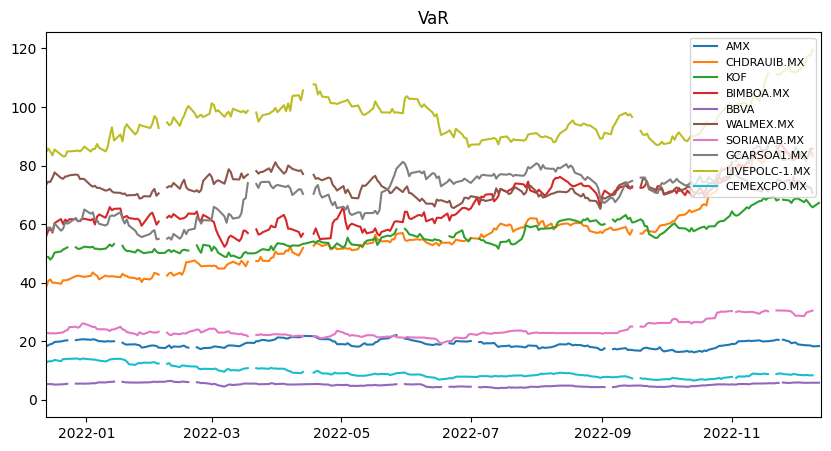

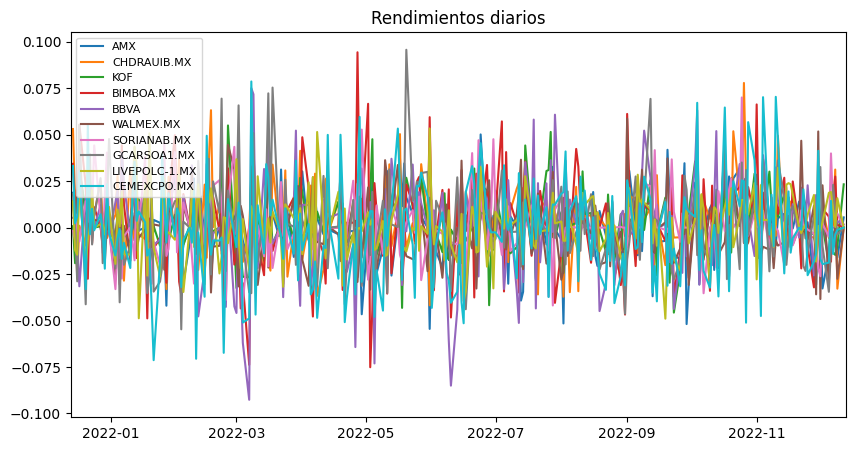

,AMX,BBVA,BIMBOA.MX,CEMEXCPO.MX,CHDRAUIB.MX,GCARSOA1.MX,KOF,LIVEPOLC-1.MX,SORIANAB.MX,WALMEX.MX
Date,,,,,,,,,,
2021-12-14 00:00:00,0.018747,0.005282,0.034313,0.033175,0.053038,0.018185,0.000783,0.014167,-0.001754,0.014362
2021-12-15 00:00:00,0.019979,0.005254,0.011909,0.002294,0.014425,-0.001168,-0.019167,-0.012152,-0.007030,-0.000794
2021-12-16 00:00:00,0.010309,-0.006969,-0.020679,0.006102,-0.027477,-0.028910,0.017747,-0.014601,0.007080,0.018938
2021-12-17 00:00:00,0.030612,-0.031579,0.055279,0.030326,0.000991,0.055412,0.031936,0.023568,-0.007469,0.023915
2021-12-20 00:00:00,0.008911,0.016304,0.022938,-0.033113,-0.009656,-0.041252,0.007594,-0.020632,0.014166,-0.024245
2021-12-21 00:00:00,0.006870,0.007130,-0.027513,0.055556,0.030000,0.011224,0.013002,-0.006983,0.003055,-0.003903
2021-12-22 00:00:00,0.009259,0.014159,0.024693,-0.003605,-0.000485,0.039522,0.006510,0.000469,0.024369,0.010187
2021-12-23 00:00:00,0.001931,0.015707,-0.008458,0.010130,0.003157,-0.009060,0.007762,0.020150,0.008921,0.001422
2021-12-24 00:00:00,0.000000,0.000000,0.010945,-0.001433,0.007020,0.006041,0.000000,-0.000115,0.044210,0.004151


In [11]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

tickers = ["AMX","CHDRAUIB.MX", "KOF", "BIMBOA.MX", "BBVA", "WALMEX.MX", "SORIANAB.MX", "GCARSOA1.MX", "LIVEPOLC-1.MX", "CEMEXCPO.MX"]

# Descarga los datos de precios de cierre de las empresas desde Yahoo Finance
data = yf.download(tickers, start="2021-12-13", end="2022-12-13")["Adj Close"]

# Calcula el rendimiento diario de las empresas
returns = data.pct_change().dropna()
varianza = returns.var()
print(varianza)

# Calcula el VaR al 95% de confianza para cada empresa
var_95 = returns.quantile(q=0.05, axis=0)

# Grafica los datos y el VaR
plt.figure(figsize=(10,5))

# Gráfica de precios de cierre
for ticker in tickers:
    plt.plot(data[ticker], label=ticker)
    plt.plot(var_95[ticker], linestyle="--", color="k")
plt.xlim(pd.Timestamp('2021-12-13'), pd.Timestamp('2022-12-13'))
plt.legend()
plt.title("VaR")
plt.legend(loc="upper right", fontsize=8)


# Gráfica de rendimientos diarios
plt.figure(figsize=(10,5))
for ticker in tickers:
    plt.plot(returns[ticker], label=ticker)
plt.xlim(pd.Timestamp('2021-12-13'), pd.Timestamp('2022-12-13'))
plt.legend()
plt.title("Rendimientos diarios")
plt.legend(loc="upper left", fontsize=8)
plt.show()
returns.style.background_gradient(axis=1)